<a href="https://colab.research.google.com/github/dramaqueenvee/NLP-Exercise-1/blob/main/zipfslaw_in_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zipf’s Law of Abbreviation: A test among song lyrics in Catalan and English

In [ ]:
# IMPORT CATALAN DATA (a .txt)
from google.colab import files
files.upload()

In [2]:
# read it with encoding utf8
with open("catalan_lyrics_extracted.txt", "r", encoding="utf-8") as f:
    catalan_text = f.read()

print(catalan_text[:500])

Cesk Freixas  
 “Avisa ’m quan guanyi l ’amor ” (La mà dels qui t ’esperen , 2009)  
S’han creuat les vides en el lloc dels perdedors,   
avui em sento més que mai a l ’últim punt de l ’estació.  
Brindaré amb copes buides per no perdre la raó,   
avisa’m quan guanyi l ’amor; espero ser habitant del món.   
La vida, que m ’atrapa damunt d ’un tauler d ’escacs,   
tan sols un moment de descans; missatges, cafè i tabac. Miralls a la cullera i temps que s ’apaga al 
cendrer,   
qui entrarà per des


In [3]:
# clean catalan data
import re
clean_lines = [] # create list

for line in catalan_text.split("\n"):
    line = line.strip()

    if not line:
        continue
    # remove page markers
    if line.startswith("--- PAGE"):
        continue
    # remove roman numerals pages
    if re.fullmatch(r"[IVXLCDM]+", line):
        continue
    # remove any line containing a year
    if re.search(r"\b(19|20)\d{2}\b", line):
        continue
    # remove lines with quotes (song titles)
    if "“" in line or "”" in line or '"' in line:
        continue
    # remove lines with weird bullet characters
    if "\uf0d8" in line or "" in line:
        continue
    # remove artist name lines (assuming they compose very short lines)
    if len(line.split()) <= 3:
        continue

    clean_lines.append(line)

catalan_songs = "\n".join(clean_lines) # put everything into a string

with open("catalan_clean.txt", "w", encoding="utf-8") as f:
    f.write(catalan_songs)

print(catalan_songs[:1000])


S’han creuat les vides en el lloc dels perdedors,
avui em sento més que mai a l ’últim punt de l ’estació.
Brindaré amb copes buides per no perdre la raó,
avisa’m quan guanyi l ’amor; espero ser habitant del món.
La vida, que m ’atrapa damunt d ’un tauler d ’escacs,
tan sols un moment de descans; missatges, cafè i tabac. Miralls a la cullera i temps que s ’apaga al
qui entrarà per destrossar -me? Quant  em costarà la sort?
Diga’m on serem quan passi el temps i torni el fred,
potser estimant habitacions d ’algun hotel al mig del cel. Recordaré dies d ’abans i serà trist no pensar en
res, que complicat que es fa tornar, i que senzill que és creure en tot.
Potser és l ’aeroport buit d ’un viatge compartit,
o les cançons que es canten sense ganes.
Potser és només això; quants potsers hi ha en el camí?
A tu et regalo el braç, el sostre de la nit.
T’espero a la plaça, em trobaràs llegint Martí,
Potser és aquesta por de quedar sols i seguir aquí, o les portes que se ’ns tanquen quan no les pr

In [4]:
# TOKENIZE CATALAN DATA
cat_tokens = re.findall(r"\b\w+\b", catalan_songs.lower())
print(cat_tokens[:20])

['s', 'han', 'creuat', 'les', 'vides', 'en', 'el', 'lloc', 'dels', 'perdedors', 'avui', 'em', 'sento', 'més', 'que', 'mai', 'a', 'l', 'últim', 'punt']


In [ ]:
# GET ENGLISH DATA (100songs) FROM A DATASET
from datasets import load_dataset

ds = load_dataset("brunokreiner/genius-lyrics", split="train") # importing the dataset from hugging face and selecting the training set

english_songs = [] # create a list

for row in ds:
    text = row.get("lyrics")
    if text and len(text) > 100:
        english_songs.append(text)
    if len(english_songs) >= 100:
        break

english_text = "\n".join(english_songs) # put everything into a string

print("Collected songs:", len(english_songs))
# checking songs
print(english_text)

In [7]:
# TOKENIZE ENGLISH DATA
eng_tokens = re.findall(r"\b\w+\b", english_text.lower())
print(eng_tokens[:20])

['paper', 'doll', 'come', 'try', 'it', 'on', 'step', 'out', 'of', 'that', 'black', 'chiffon', 'here', 's', 'a', 'dress', 'of', 'gold', 'and', 'blue']


In [10]:
len(cat_tokens) #checking number of tokens for catalan

20177

In [11]:
len(eng_tokens) #checking number of tokens for english

33405

In [13]:
# TESTING ZIPF'S LAW OF ABBREVIATION
import pandas as pd
from collections import Counter

def create_zipf_df(tokens):
    """
   create a dataframe with pandas to test zipf's law of abbreviation, containing: word, frequency and length from a list of tokens
    """
    # count word frequencies
    counts = Counter(tokens)
    data = [] # create a list to store the data
    for word, freq in counts.items():
        data.append({
            'word': word,
            'frequency': freq,
            'length': len(word)
        })

    df = pd.DataFrame(data) # create the dataframe

    # sort by descending frequency
    df = df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    return df

# apply function to both list of tokens
df_ca = create_zipf_df(cat_tokens)
df_en = create_zipf_df(eng_tokens)

# check top 10 words
print("Catalan 10 most frequent words:")
print(df_ca.head(10))
print("\nEnglish 10 most frequent words:")
print(df_en.head(10))
print("\nCatalan 10 least frequent words:")
print(df_ca.tail(10))
print("\nEnglish 10 least frequent words:")
print(df_en.tail(10))


Catalan 10 most frequent words:
  word  frequency  length
0    i        775       1
1   la        636       2
2  que        635       3
3   de        527       2
4   el        518       2
5    a        433       1
6   no        347       2
7   un        319       2
8    l        304       1
9  per        224       3

English 10 most frequent words:
  word  frequency  length
0    i       1752       1
1  you       1354       3
2  the        939       3
3  and        778       3
4   to        738       2
5    a        660       1
6   my        619       2
7   me        574       2
8   it        519       2
9    s        470       1

Catalan 10 least frequent words:
            word  frequency  length
3985     badalla          1       7
3986  espeteguen          1      10
3987   perdedors          1       9
3988    brindaré          1       8
3989       avisa          1       5
3990      guanyi          1       6
3991     llançar          1       7
3992        érem          1       4
3993 

In [9]:
# spearman correlation, calculating rank coefficient
corr_ca = df_ca['frequency'].corr(df_ca['length'], method='spearman')
corr_en = df_en['frequency'].corr(df_en['length'], method='spearman')

print(f"Correlation in Catalan: {corr_ca:.4f}")
print(f"Correlation in English: {corr_en:.4f}")

Correlation in Catalan: -0.3330
Correlation in English: -0.3183


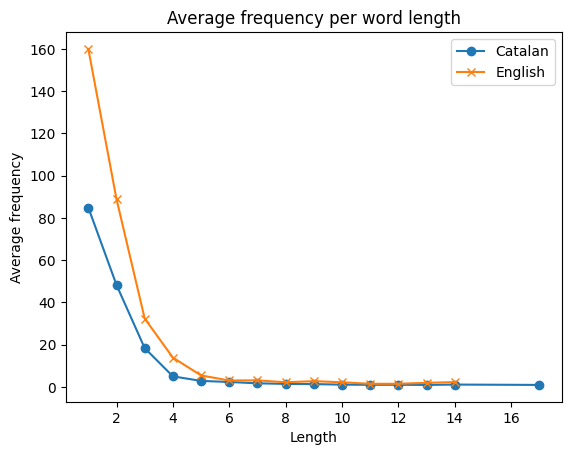

In [18]:
# compute average frequency by length in a visual graph
import matplotlib.pyplot as plt

# group by length and compute average frequency
df_ca.groupby('length')['frequency'].mean().plot(label='Catalan', marker='o')
df_en.groupby('length')['frequency'].mean().plot(label='English', marker='x')

plt.title("Average frequency per word length")
plt.xlabel("Length")
plt.ylabel("Average frequency")
plt.legend()
plt.show()